# How does the prior influence the posterior?

In [1]:
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import pymc3 as pm

In [2]:
binary_data = np.loadtxt("example_data/binary_data.csv", dtype="int64")
count_data = np.bincount(binary_data)
values = np.nonzero(count_data)[0]

Text(0.5, 1.0, 'The incident took place in 48.00 percent of the occurrences in observed data')

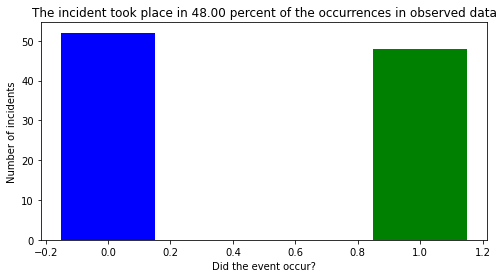

In [3]:
figsize(8, 4)
bar_list = plt.bar(x=values, height=count_data, width=0.3, align='center', color=['b', 'g'])
plt.xlabel("Did the event occur?")
plt.ylabel("Number of incidents")
plt.title("The incident took place in %.2f percent of the occurrences in observed data" % (count_data[1]/count_data.sum() * 100))

### Analysis using a strong prior

In [4]:
basic_model = pm.Model()
with basic_model:
    # Priors for unknown model parameters
    # rate_of_event = pm.Beta("rate_of_event", alpha=5, beta=1)
    rate_of_event = pm.Uniform("rate_of_event", lower=0.7, upper=0.8) # strong belief
    # Likelihood (sampling distribution) of observations
    observation = pm.Bernoulli("observation", rate_of_event, observed=binary_data)
    trace = pm.sample(10000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rate_of_event]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 14 seconds.


                mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
rate_of_event  0.709  0.008     0.7    0.723        0.0      0.0    9192.0   

               ess_sd  ess_bulk  ess_tail  r_hat  
rate_of_event  9192.0    6113.0    5710.0    1.0  


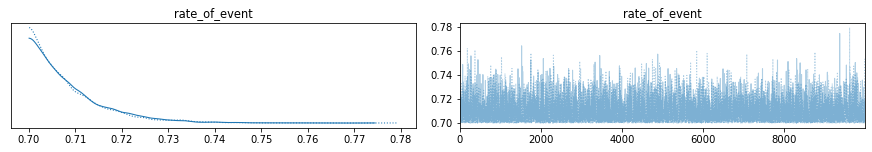

In [5]:
with basic_model:
    axes_arr = az.plot_trace(trace)
    print(az.summary(trace))
plt.draw()

### Analysis using a weak prior

In [6]:
basic_model = pm.Model()
with basic_model:
    # Priors for unknown model parameters
    # rate_of_event = pm.Beta("rate_of_event", alpha=5, beta=1)
    rate_of_event = pm.Uniform("rate_of_event", lower=0, upper=1) # weak belief
    # Likelihood (sampling distribution) of observations
    observation = pm.Bernoulli("observation", rate_of_event, observed=binary_data)
    trace = pm.sample(10000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rate_of_event]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 13 seconds.


               mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_mean  \
rate_of_event  0.48  0.049   0.389    0.574      0.001      0.0    9297.0   

               ess_sd  ess_bulk  ess_tail  r_hat  
rate_of_event  9297.0    9339.0   14441.0    1.0  


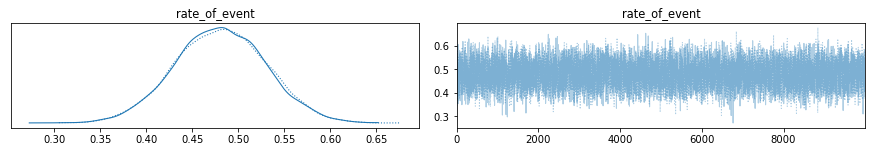

In [7]:
with basic_model:
    axes_arr = az.plot_trace(trace)
    print(az.summary(trace))
plt.draw()